# Heart Disease Prediction

I chose a fairly simple data set that includes health factors for about 1000 people. Some of these factors include age, sex and cholesteral levels. The target column was already included and indicated a diagnoses of heart disease as 1 and no diagnoses as 0. After exploring the data, it was clear that there was no additional cleaning to be done. So, I moved on to the feature engineering and clustering techniques. 

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

In [5]:
df.shape

(1025, 14)

In [6]:
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

target      0.0
thal        0.0
ca          0.0
slope       0.0
oldpeak     0.0
exang       0.0
thalach     0.0
restecg     0.0
fbs         0.0
chol        0.0
trestbps    0.0
cp          0.0
sex         0.0
age         0.0
dtype: float64

In [7]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [8]:
df.reset_index(inplace=True)

In [9]:
X = df.drop('target', axis=1)
y = df.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Clustering Techniques

In [10]:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)


%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

117 ms ± 42.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


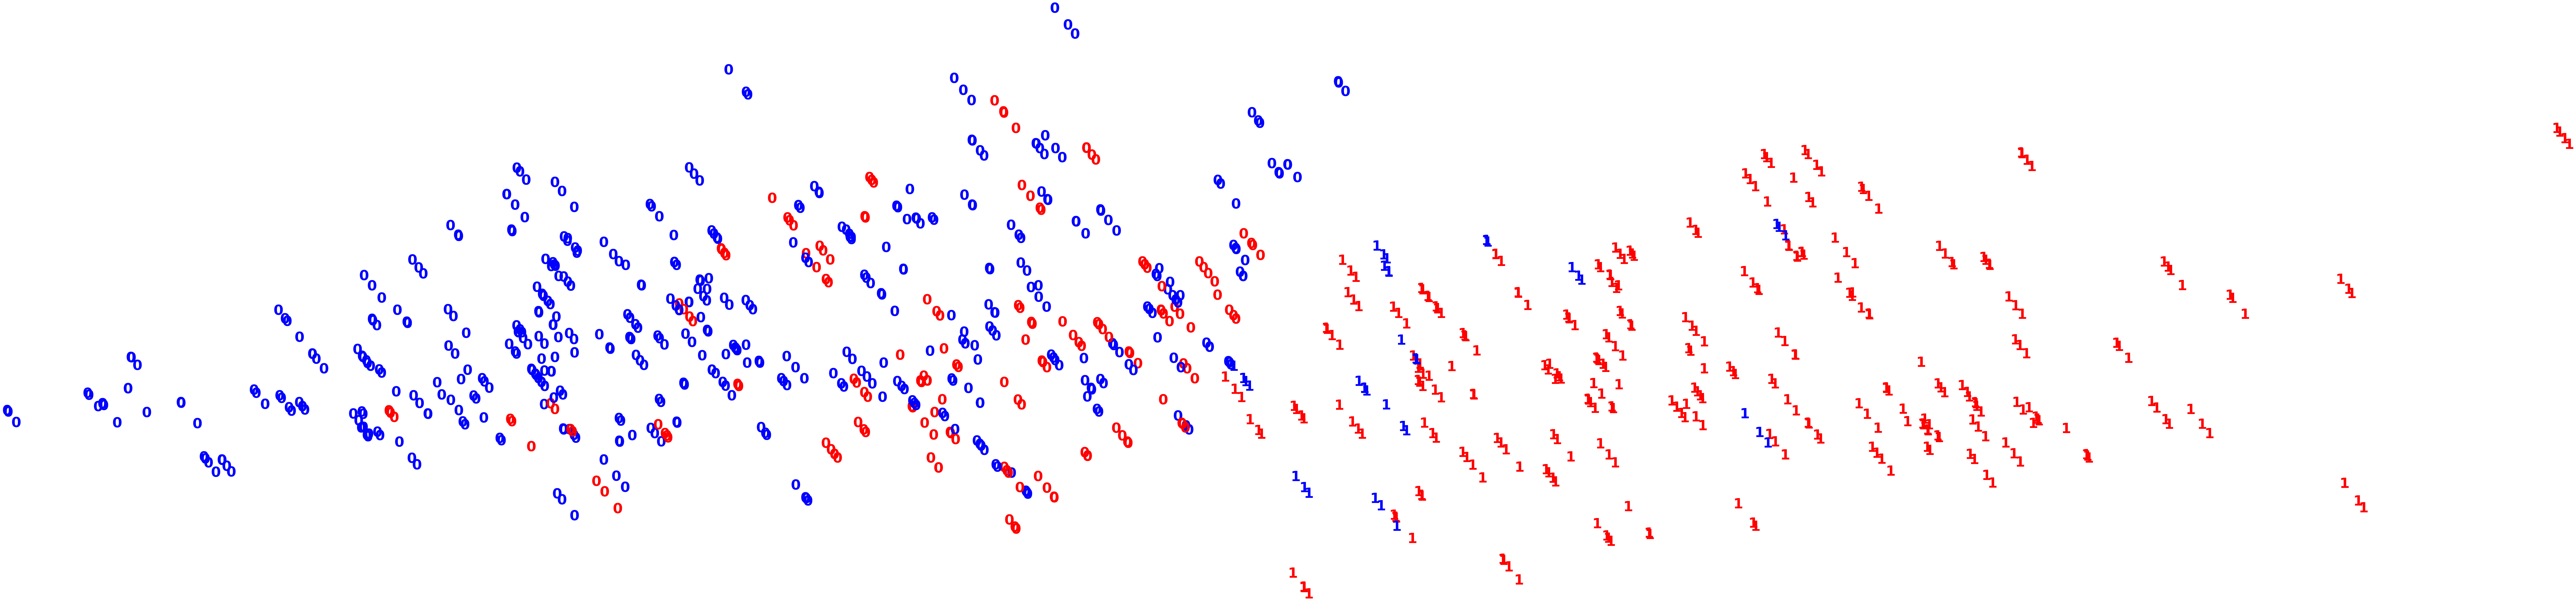

In [11]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(20,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

38.5 ms ± 6.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


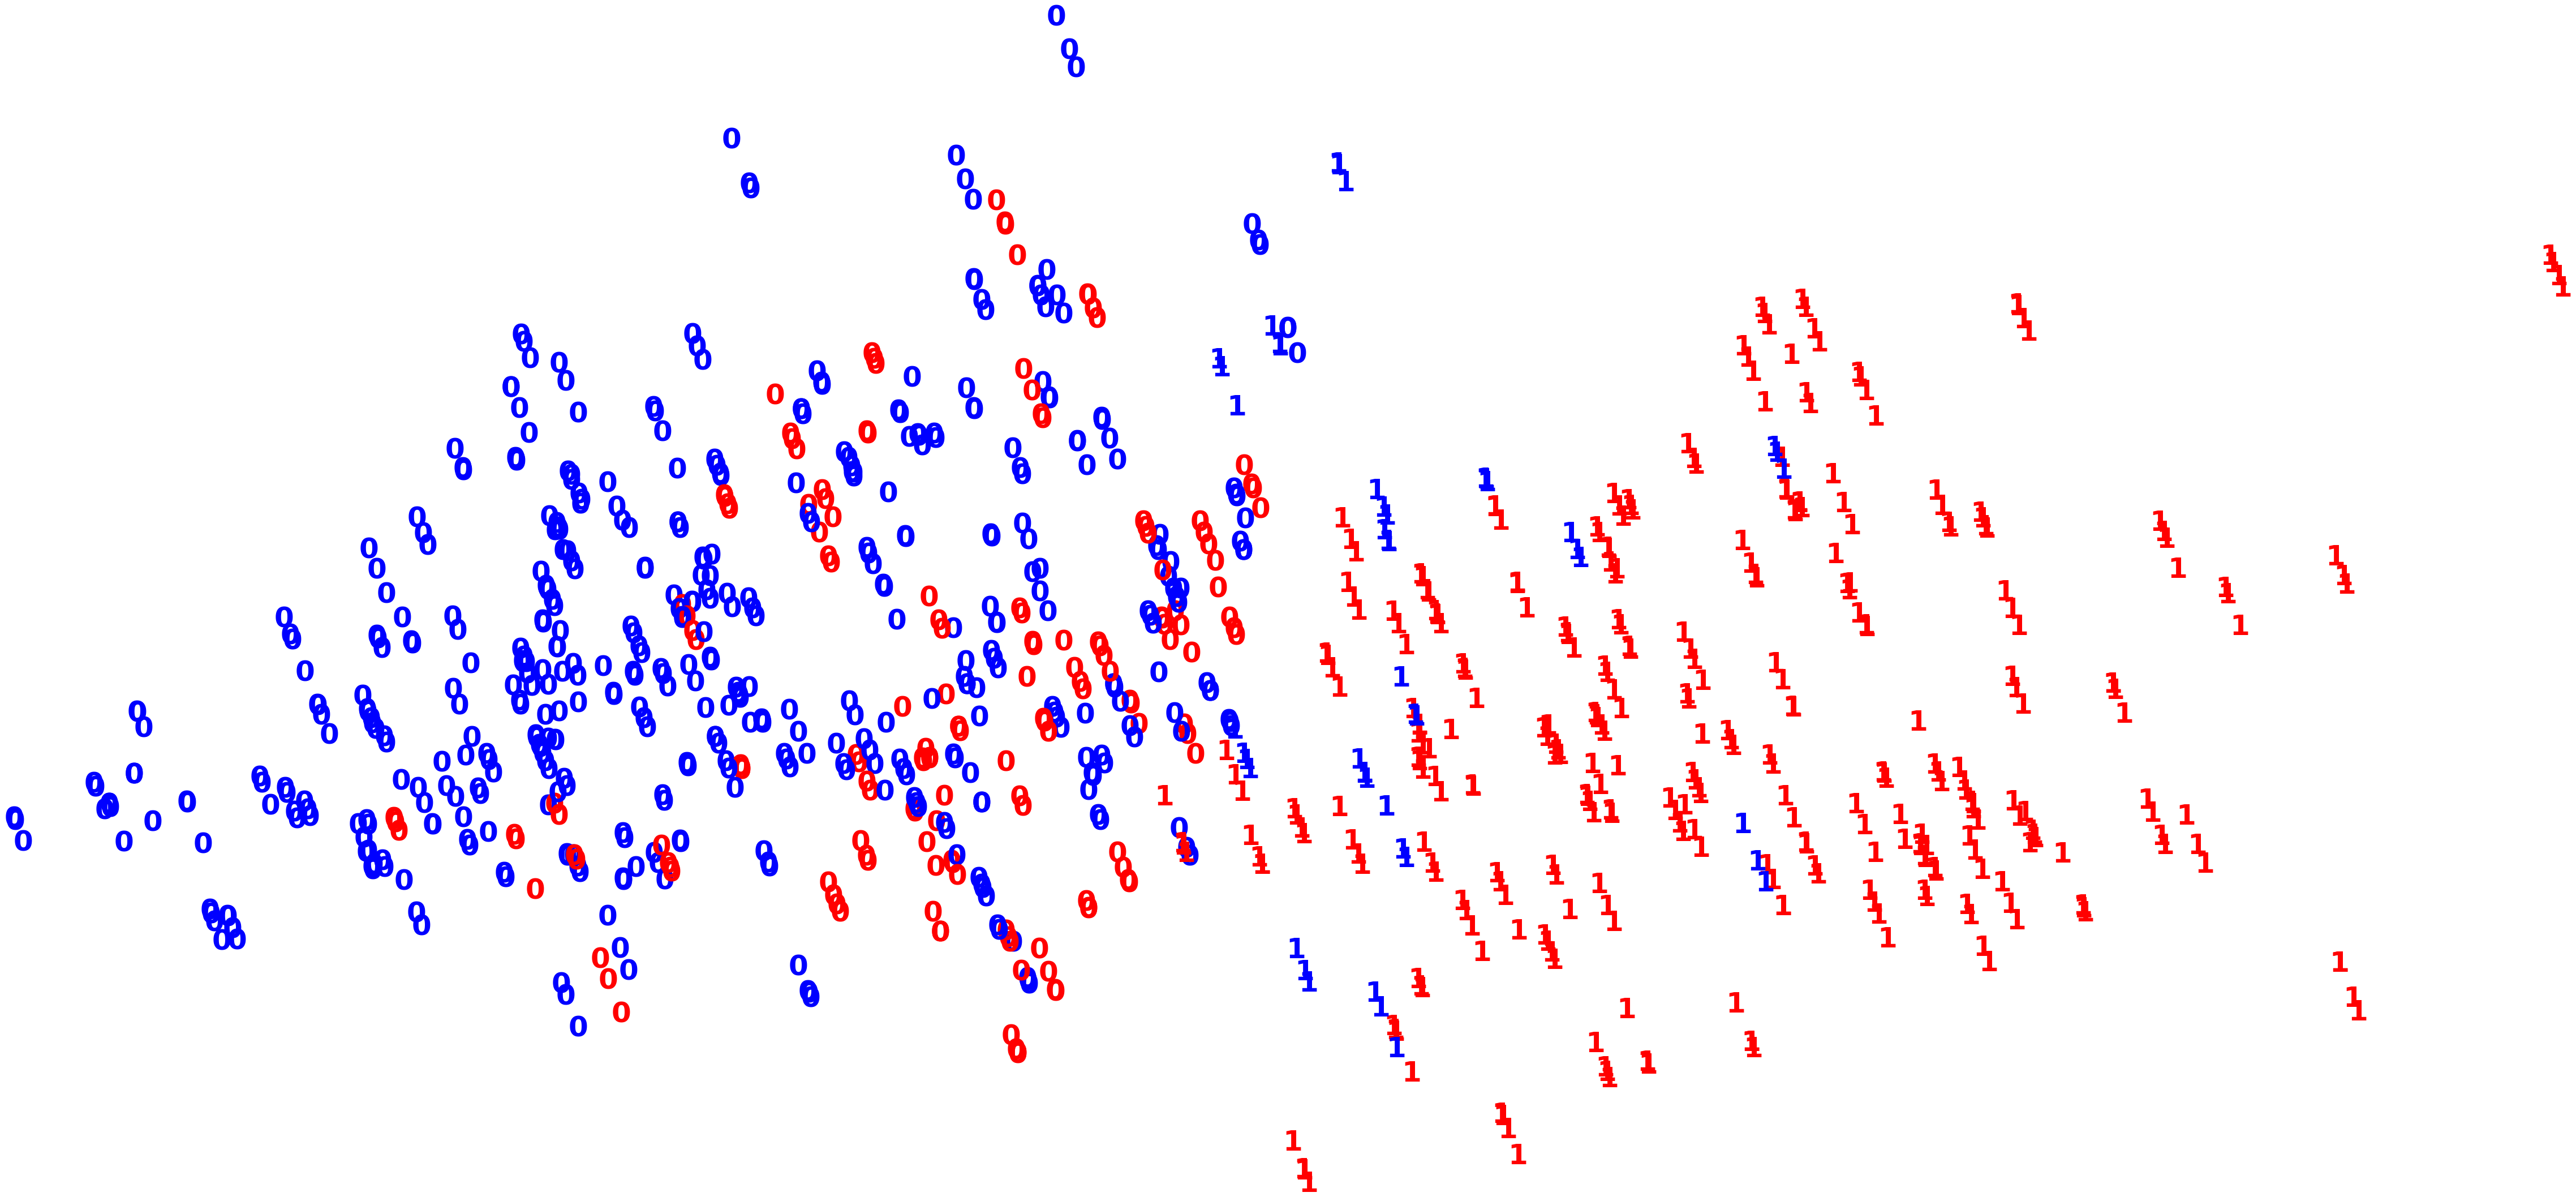

In [12]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

For both, K-means and minikmeans, there does not seem to be distinct clusters. The colors are somewhat separated, but the value given (0 or 1) is the opposite of what I expected. I am looking for red 0's and blue 1's. 

In [13]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=1, min_samples=5, metric='euclidean')

clusters = dbscan_cluster.fit_predict(X_std)

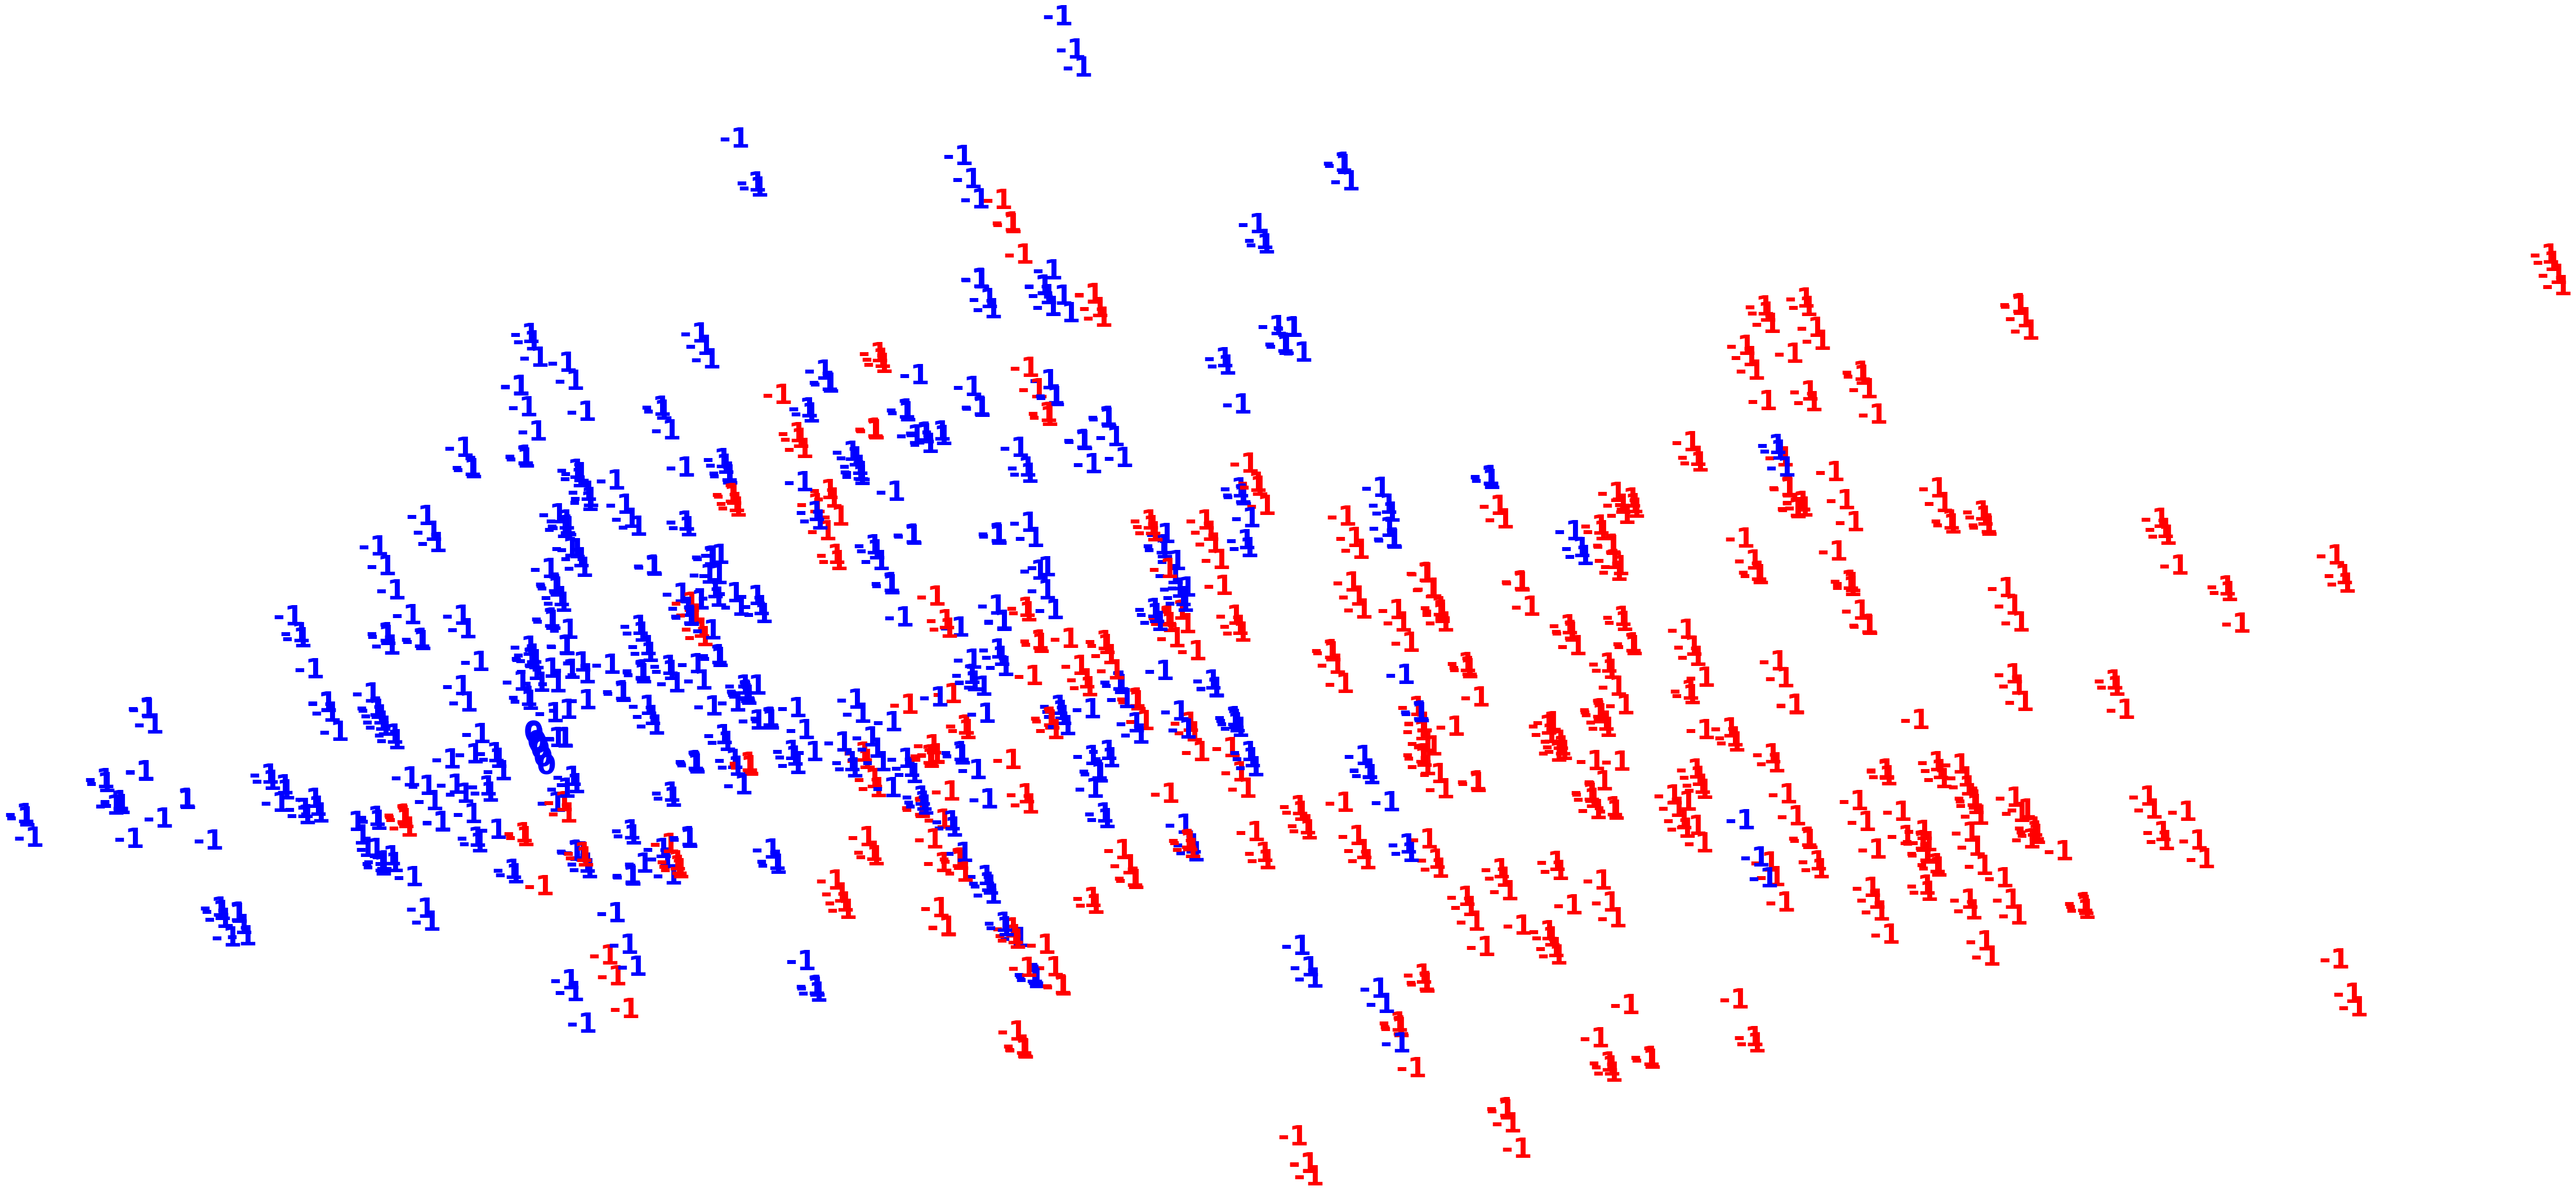

In [14]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

DBSCAN produces a graph full of noise. Moving on to another method to see if I can get a better result. 

Next, I tried GaussianMixture three different times changing parameters to see if I could improve the results. What I noticed is that the values made a noticable shift. There are mostly red 0's and blue 1's. Changing the parameters did not make a difference. It has been the best model so far, however. 

In [15]:
from sklearn.mixture import GaussianMixture
# Defining the agglomerative clustering
gmm_cluster_1 = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters_1 = gmm_cluster_1.fit_predict(X_std)

In [16]:
from sklearn.mixture import GaussianMixture
# Defining the agglomerative clustering
gmm_cluster_2 = GaussianMixture(n_components=2, random_state=123, warm_start=True, max_iter=250)

# Fit model
clusters_2 = gmm_cluster_2.fit_predict(X_std)

In [17]:
from sklearn.mixture import GaussianMixture
# Defining the agglomerative clustering
gmm_cluster_3 = GaussianMixture(n_components=2, random_state=123, warm_start=True, max_iter=500)

# Fit model
clusters_3 = gmm_cluster_3.fit_predict(X_std)

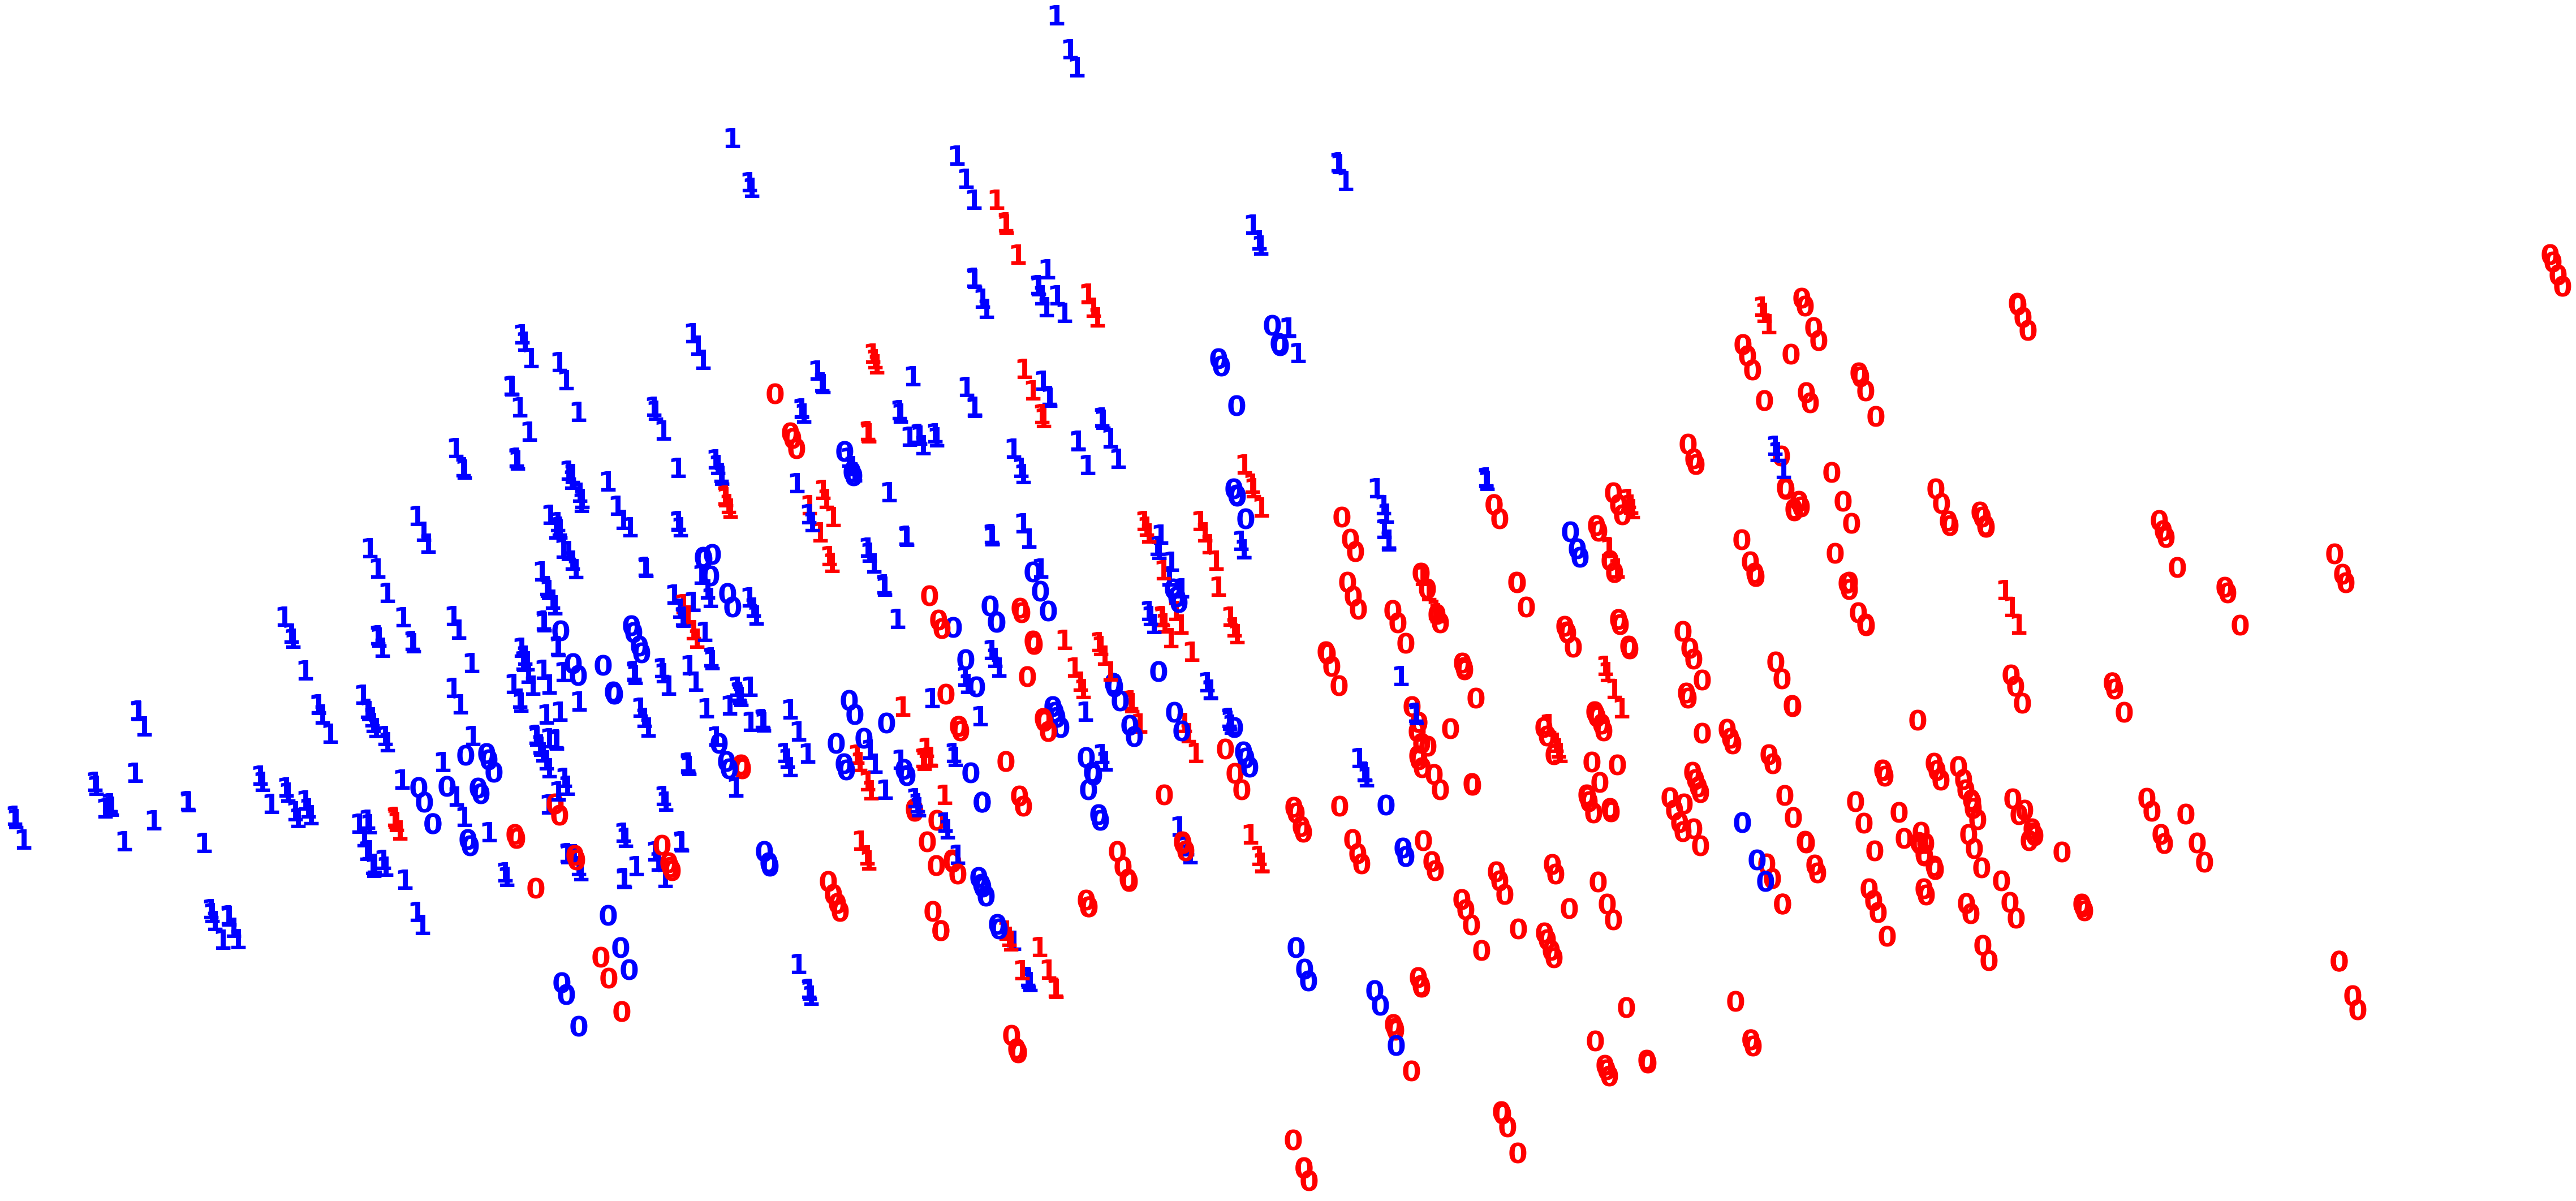

In [18]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_1[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

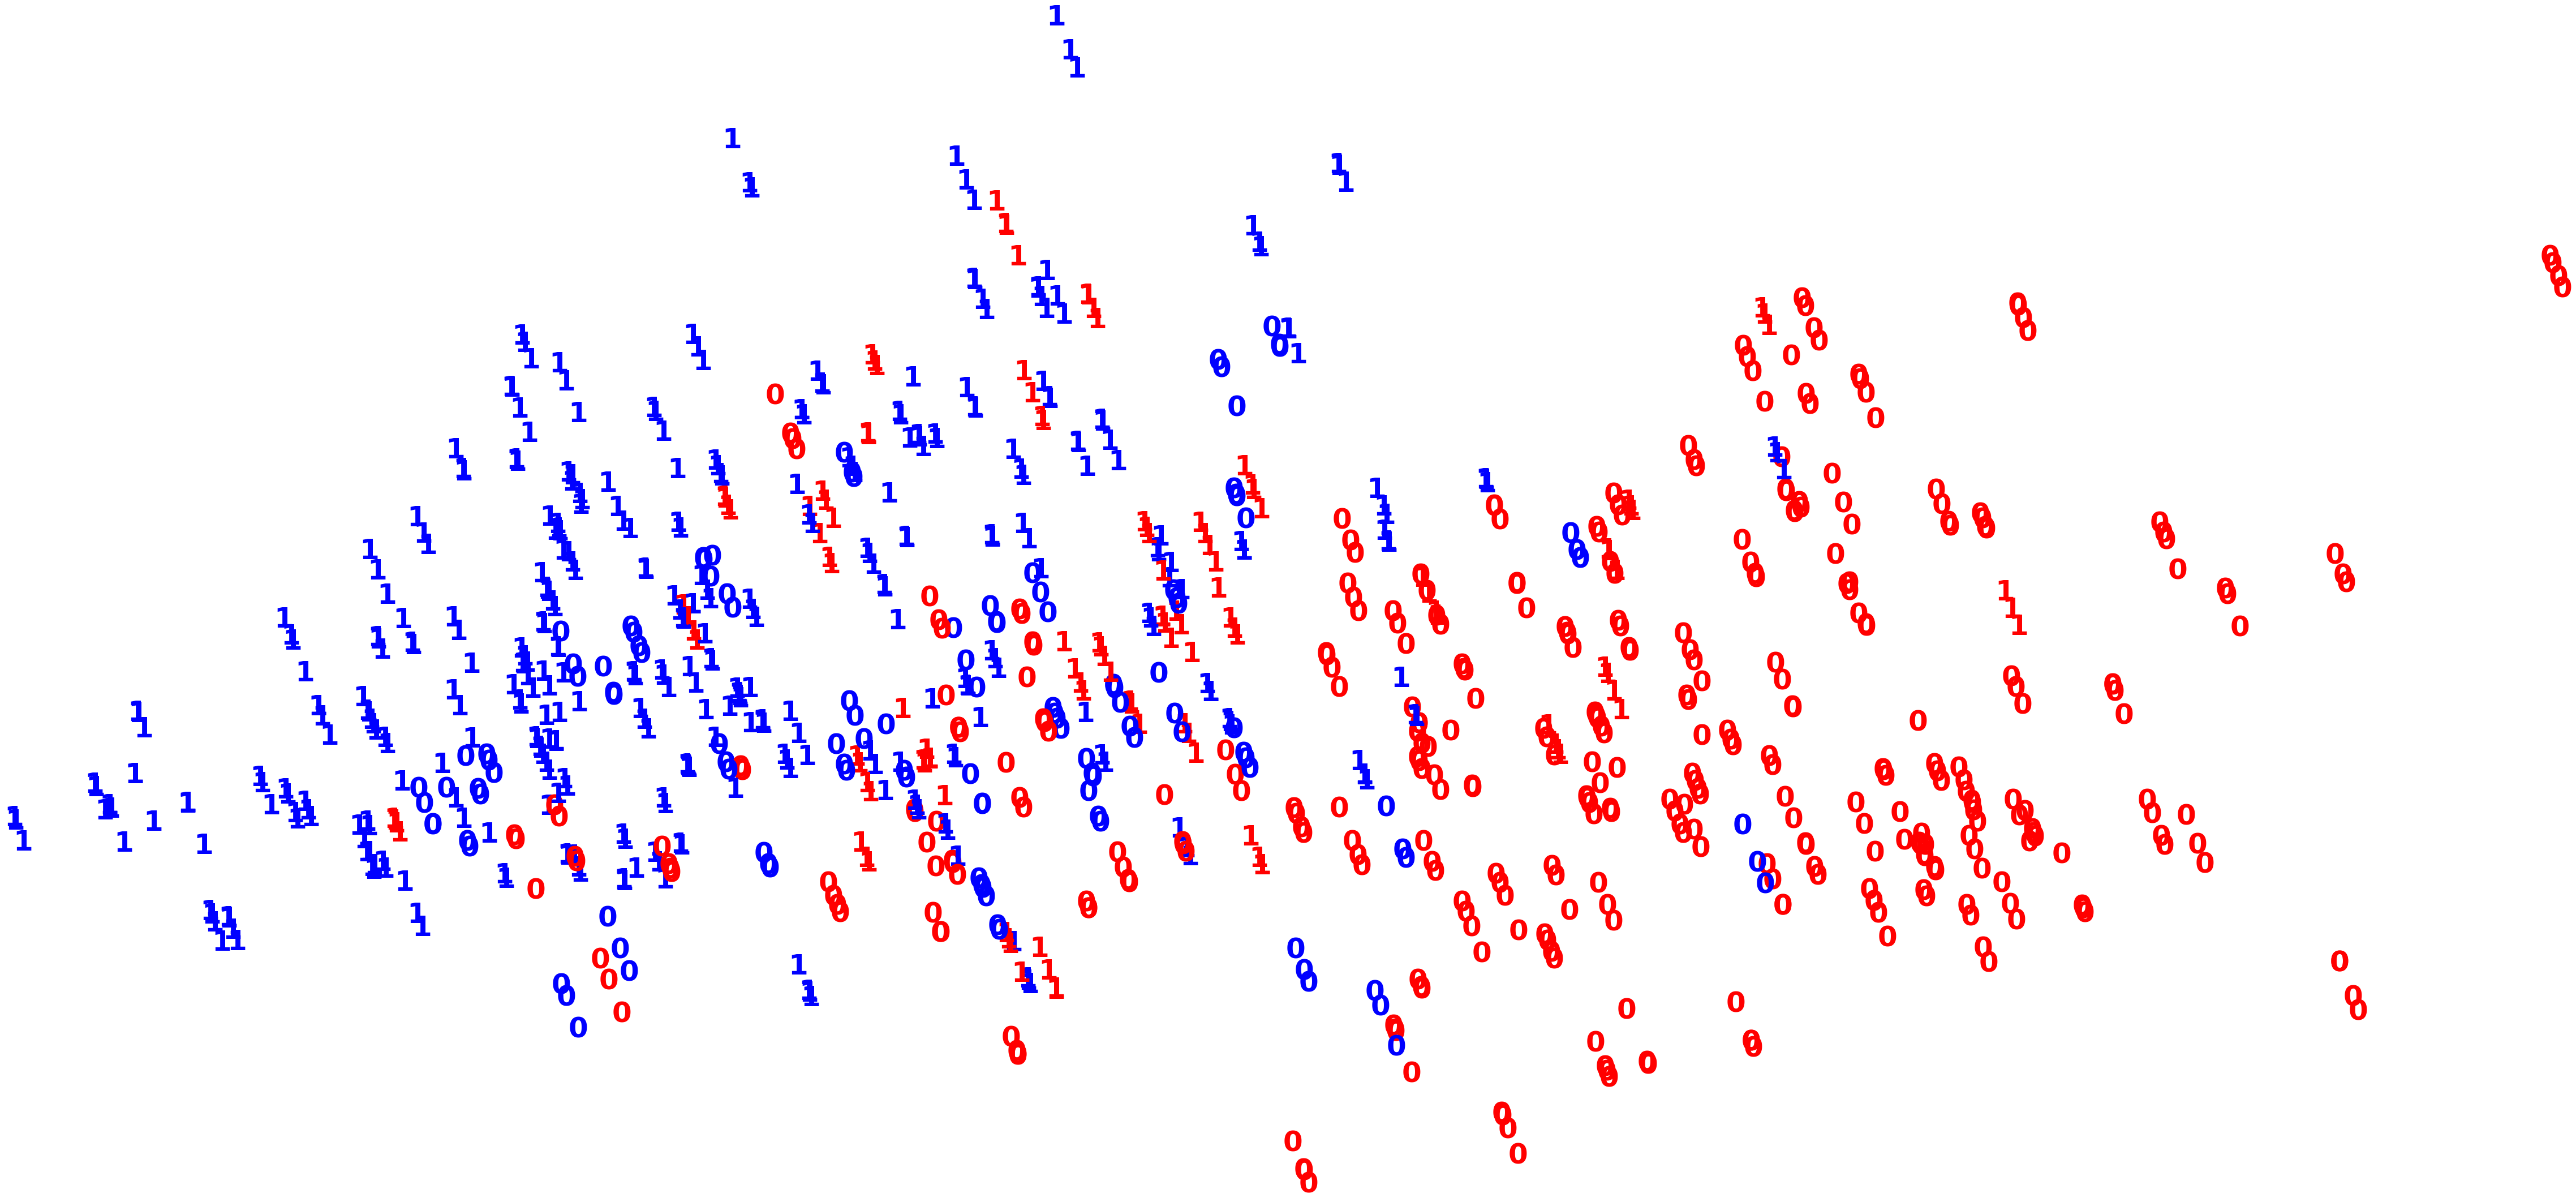

In [19]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_2[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

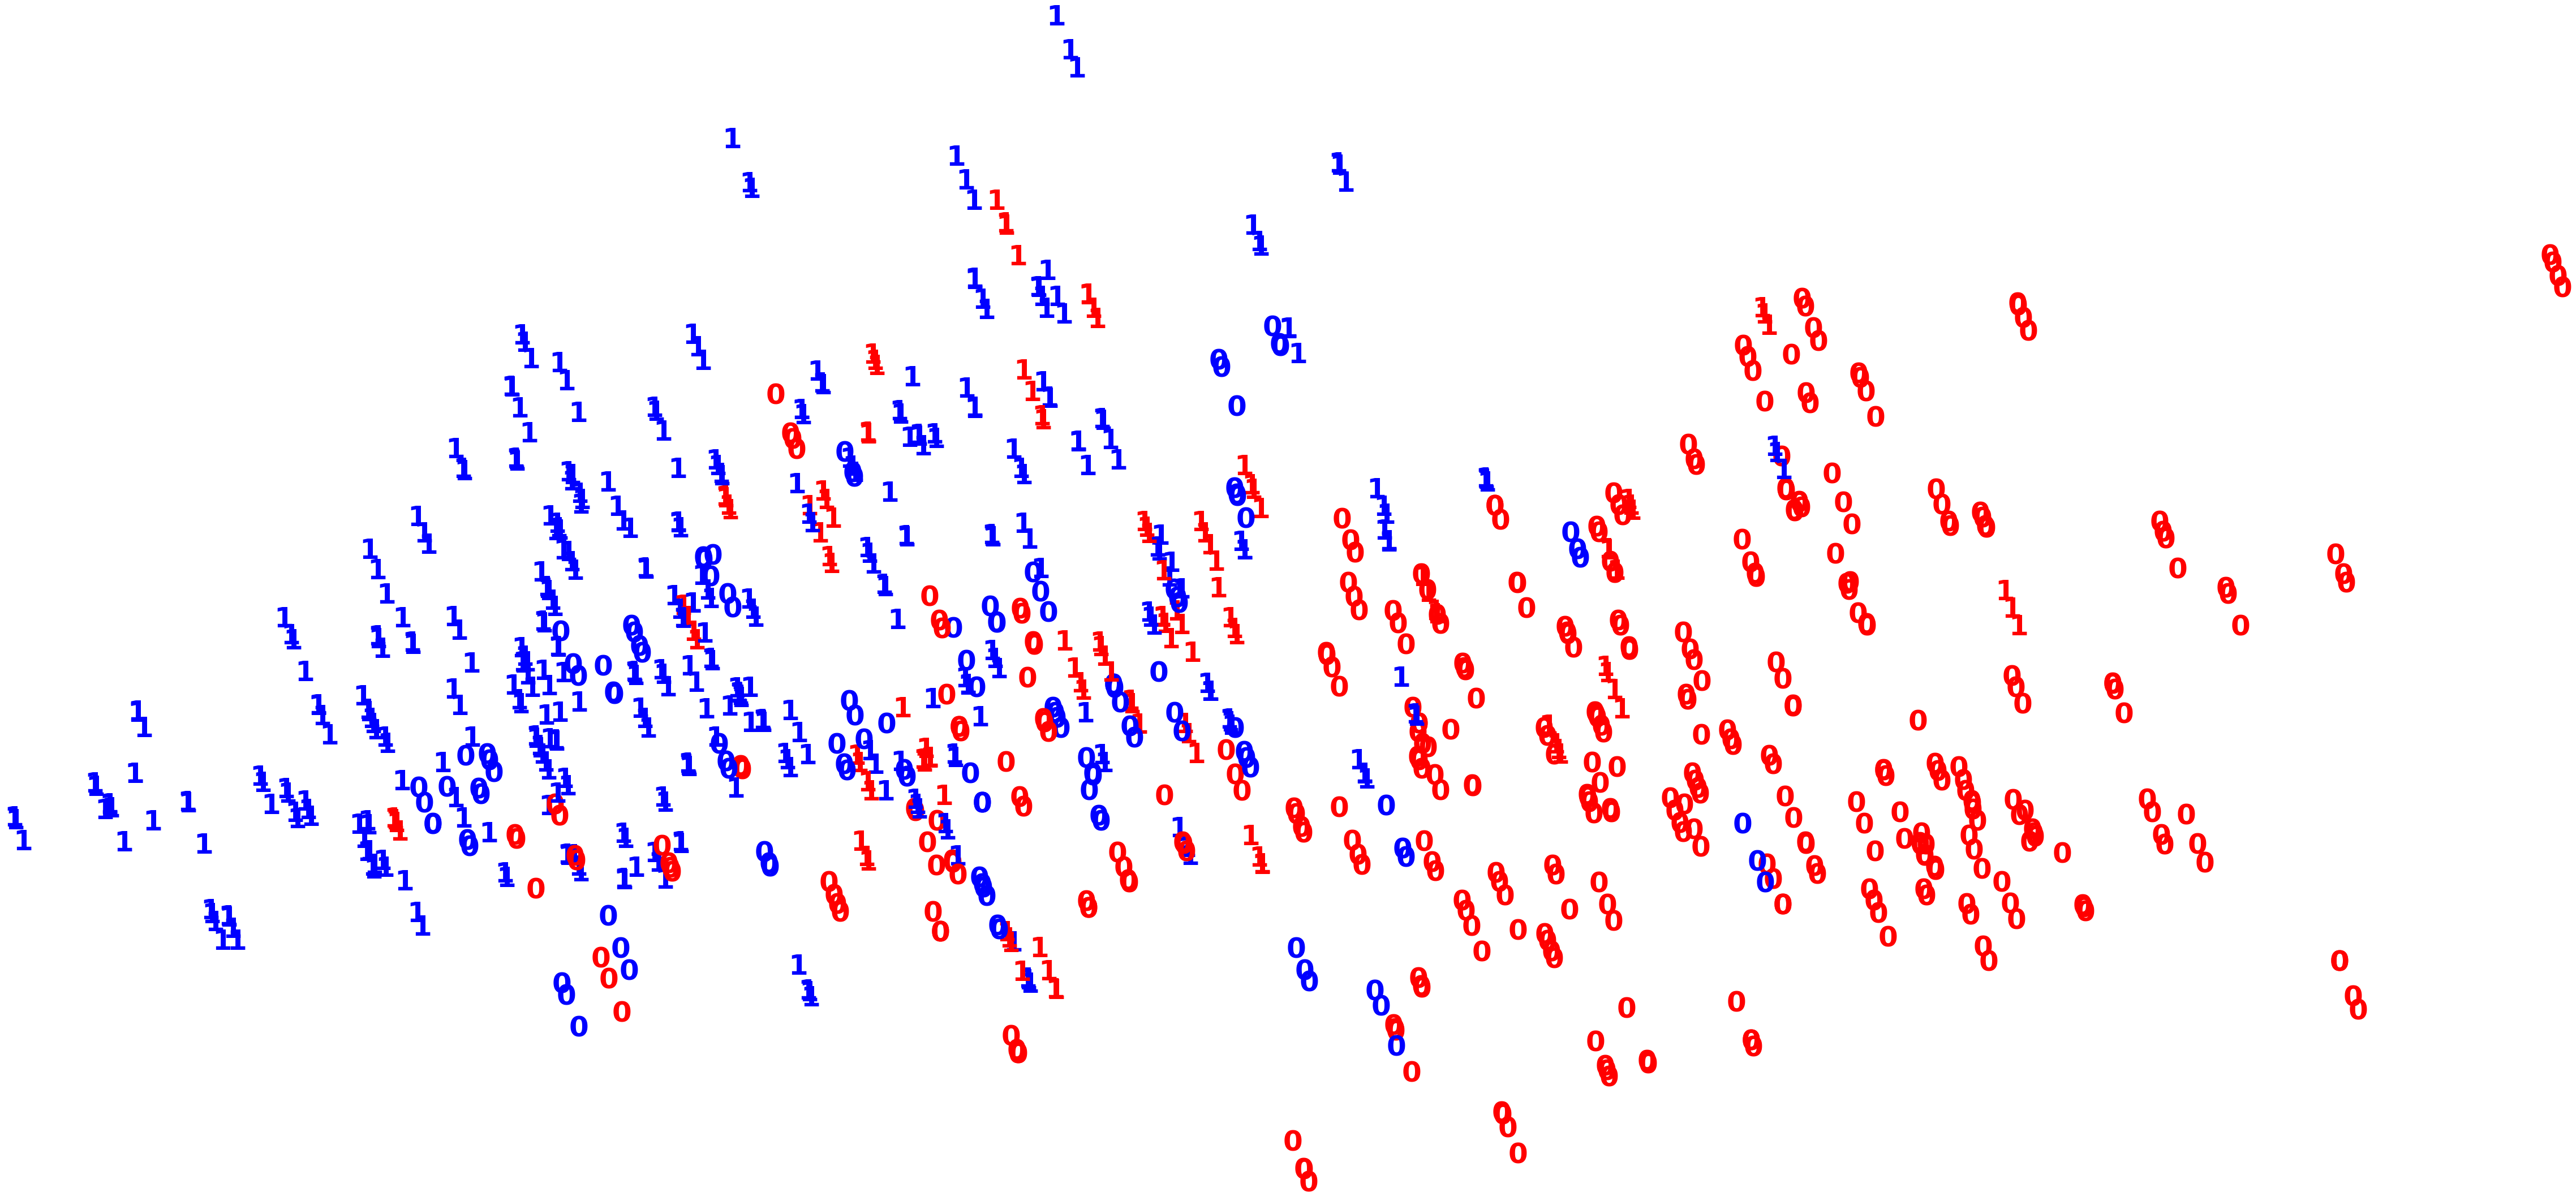

In [20]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_3[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Dimensionality Reduction
Next, I applied dimensionality reduction techniques including: PCA, t-SNE and UMAP.

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_std)

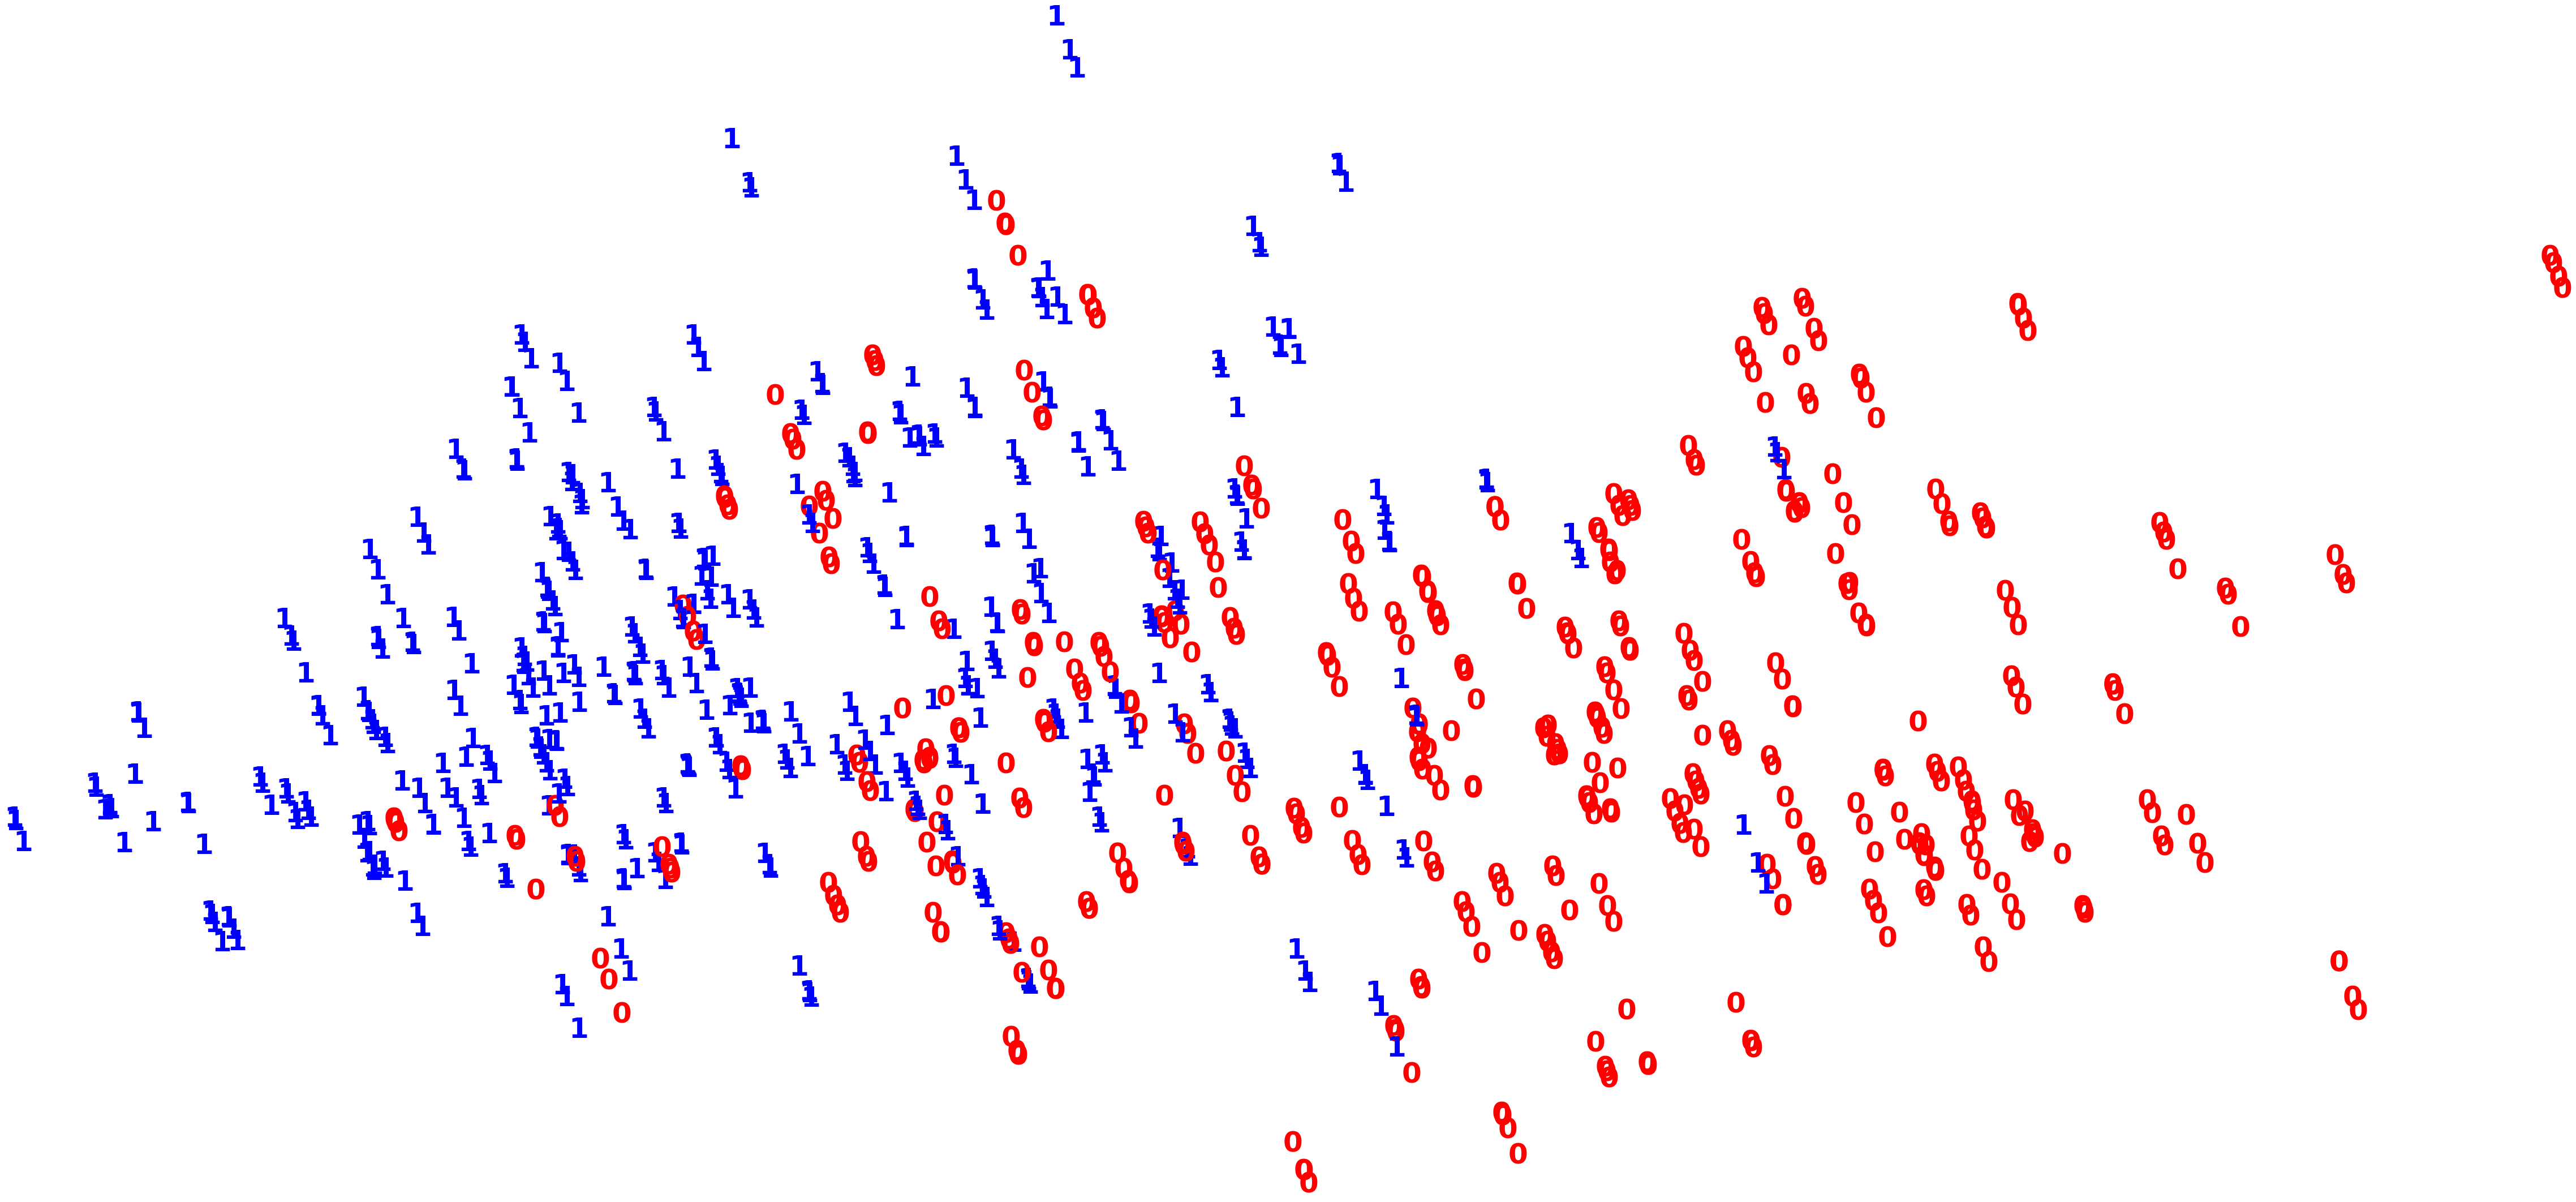

In [23]:
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

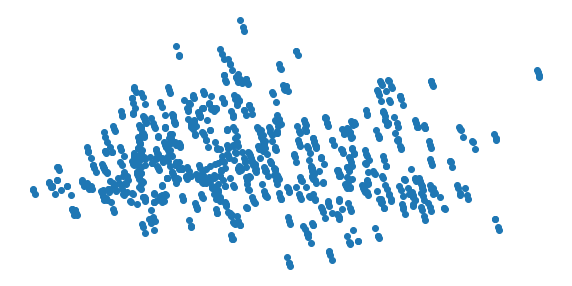

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [25]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1025 samples in 0.001s...
[t-SNE] Computed neighbors for 1025 samples in 0.061s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1025
[t-SNE] Computed conditional probabilities for sample 1025 / 1025
[t-SNE] Mean sigma: 1.552497
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.343246
[t-SNE] KL divergence after 300 iterations: 1.045354
t-SNE done! Time elapsed: 3.7807281017303467 seconds


In [26]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [27]:
import umap

In [28]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 6.599218845367432 seconds


In [29]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

While interesting visuals, t-SNE and UMAP did not seem to be of any use in predicting the target. There are no distinguishable clusters. Based on the overall results, it seems that there wasn't enough data to get a clear picture of the clusters to predict a heart disease diagnosis. For next steps, I would gather more data, include more subjects and a wider range of health factors to include.